In [1]:
# adapted from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

import pandas as pd
import tensorflow as tf

# fix random seed for reproducibility
tf.random.set_seed(7)

2024-12-20 15:12:27.674051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734736347.691838  454329 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734736347.696827  454329 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 15:12:27.715552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_parquet("../data/time_slices.parquet")

X = df.drop(["winner", "season", "game"], axis=1)
y = df["winner"]

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # convert "home" and "away" to categories

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

I0000 00:00:1734736351.115365  454329 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1383 MB memory:  -> device: 0, name: NVIDIA GeForce GT 1030, pci bus id: 0000:01:00.0, compute capability: 6.1


Epoch 1/100


I0000 00:00:1734736354.029411  454480 cuda_dnn.cc:529] Loaded cuDNN version 90600


12610/12610 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - loss: 0.4696 - val_loss: 0.4035
Epoch 2/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - loss: 0.4046 - val_loss: 0.4042
Epoch 3/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 72s 6ms/step - loss: 0.4034 - val_loss: 0.4032
Epoch 4/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - loss: 0.4024 - val_loss: 0.4001
Epoch 5/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - loss: 0.4011 - val_loss: 0.4011
Epoch 6/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - loss: 0.4001 - val_loss: 0.3999
Epoch 7/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - loss: 0.3999 - val_loss: 0.4005
Epoch 8/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 72s 6ms/step - loss: 0.3997 - val_loss: 0.3996
Epoch 9/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - loss: 0.3995 - val_loss: 0.3995
Epoch 10/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - loss: 0.3993 - val_loss: 0.3993
Epoch 11/100
12610/12610 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - loss: 0.3991 - val_loss: 0.399

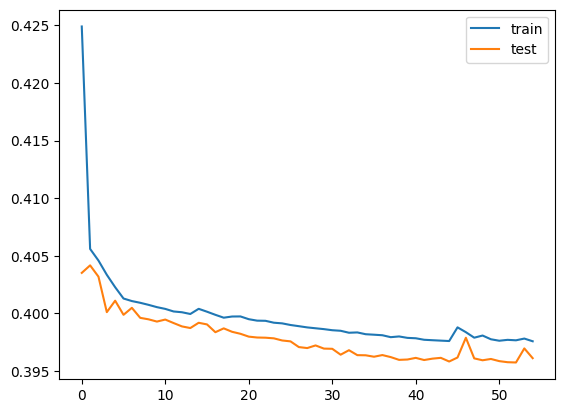

In [3]:
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout, Input
from keras.models import Sequential
from matplotlib import pyplot

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)

model = Sequential([
    Input(shape=(1, 1)),
    LSTM(16),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [4]:
model.save("meter_lstm16d2.keras")